 # Cervical Cancer Risk Classification

 ### Breif Overview:
 The model created below is for prediction the cervical cancer risk.

 Dataset is Obtained from UCI Repository
 ref: https://www.kaggle.com/datasets/loveall/cervical-cancer-risk-classification

 The notebook is briefly summarized as follows:

 1. Data Preparation and Inspection - Preparing data for evaluation.

 2. Data Quality Checks and filtering - Performing basic checks on data for better understanding of data.

 3. Feature inspection - Correlation and feature Mutual information plots against the target variable. Inspection of the Binary, categorical and other variables.

 4. Feature importance ranking via learning models

 5. Training - training data against multiple machine learning algorthms and fine tuning a couple of algorithms for accuracy

 # 1. Data Preparation and Inspection
 Import data from .csv file to notebook as pd, and overview the data.

In [23]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot
from pandas import read_csv, set_option
import seaborn as sns
import sys

if "3.10.6" not in sys.version:
  from google.colab import drive
  drive.mount('/content/drive')
  syspath = "/content/drive/Shareddrives/DM2022/"
else:
  syspath = "./"

data_file = syspath + "cervical_cancer.csv"
data = pd.read_csv(data_file, parse_dates=[1])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
data.head(10)
print(data.shape)
print(data.dtypes)


(858, 36)
Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object


 # 2. Data Quality Checks and filtering -
 Performing basic checks on data for better understanding of data.

In [25]:
# Check the statistics of the columns of the merged dataframe and check for outliers
print(data.describe())


              Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513                   0.087413    0.020979    0.010490   
std      8.497948                   0.302545    0.143398    0.101939   
min     13.000000                   0.000000    0.000000    0.000000   
25%     20.000000                   0.000000    0.000000    0.000000   
50%     25.000000                   0.000000    0.000000    0.000000   
75%     32.000000                   0.000000    0.000000    0.000000   
max     84.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min      0.000000    0.000000  

<Axes: >

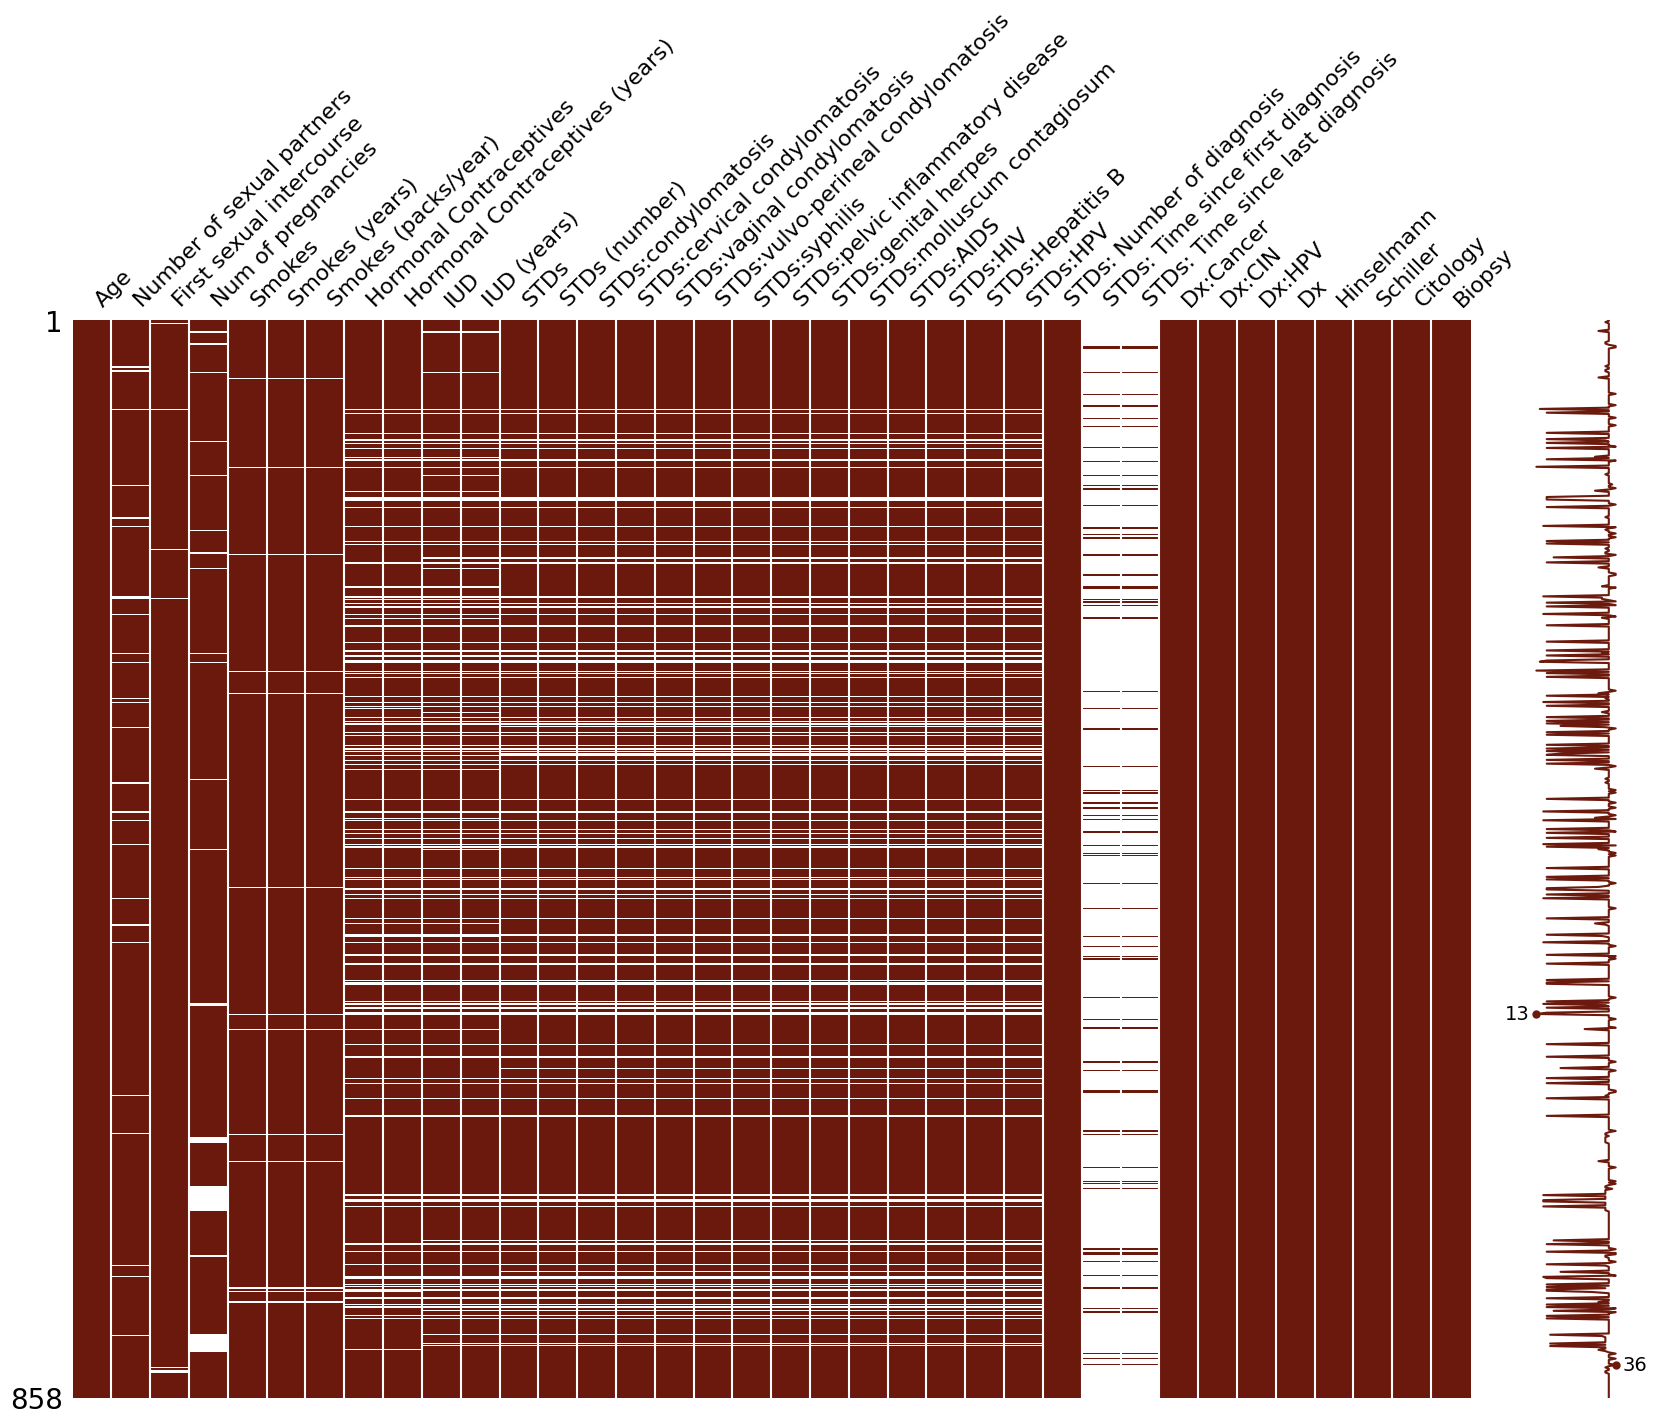

In [26]:
# Replace '?' with nan
data = data.replace("?", np.nan)
# Check Nullity or missing values by columns
import missingno as msno
msno.matrix(df=data.iloc[:], figsize=(20, 14), color=(0.42, 0.1, 0.05))


In [ ]:
#  Not sure what this part for???
# arr = [0,1,2]
# data2 = data.iloc[:, arr]

# data2.info()


In [27]:
# 將資料轉成float
for col in data.columns:
    data[col] = pd.to_numeric(data[col])

# data.head(10)
print(data.dtypes)


Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [28]:
# na填入中位數
import scipy
for col in data.columns[1:11]:
    med = scipy.nanmedian(data[col])
    data[col] = data[col].fillna(med)

data.head(10)


<ipython-input-28-ba684b84265d>:4: DeprecationWarning:

scipy.nanmedian is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmedian instead



,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,...,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,2.0,1.0,1.266973,2.8,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [29]:
# 處理na
print(data.shape)
data = data.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'STDs:AIDS', 'STDs:cervical condylomatosis'], axis=1)   # 都是na，所以刪除
data = data.dropna()    #刪除STDs中間那一大段na
print(data.shape)


(858, 36)
(753, 32)


In [ ]:
# 1, 2, 3, 5, 6, 9, 11, 13
# print(data.columns[13])


In [30]:
# 處理資料類別
# import predefined table specified which type is the attribute
translation_path = syspath + "Translation.csv"
with open(translation_path) as f:
    lines = f.readlines()
typelist = []
for line in lines:
    typelist.append(line.replace('\n', '').split(','))
# print(lines[0][3])
# explaination: [index, type, Eng_name, Ch_name]
# type 0 for boolean, 1 for integer


## The following cell is showing the data type of each entry.

In [31]:
# int_list = [0, 1, 2, 3, 5, 6, 8, 10]
int_list = []
# to int
for i in range(34):
    if(typelist[i][1] == '1'):
        data[data.columns[i]] = data[data.columns[i]].astype(int)
        int_list.append(i)
    else:
        data[data.columns[i]] = data[data.columns[i]].astype(bool)

df_int_corr = data.iloc[:, int_list]

'''
for col in range(34):
    if col not in int_list:
        data[data.columns[col]] = data[data.columns[col]].astype(bool)
'''
data.head(10)
print(data.dtypes)


IndexError: ignored

## The following cell is showing the corelation between each attributes.

In [ ]:
colormap = pyplot.cm.afmhot
pyplot.figure(figsize=(16,12))
pyplot.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(df_int_corr.corr(),linewidths=0.1,vmax=1.0, square=True,
            cmap=colormap, linecolor='white', annot=True)
pyplot.show()

## Using number to represent boolean value

In [ ]:
# Data Catgorization
def age_type(num):
  if num == 0:
    return "0"
  elif 1 <= num and num <= 5:
    return "1"
  elif 6 <= num and num <= 11:
    return "2"
  elif 12 <= num and num <= 17:
    return "3"
  elif 18 <= num and num <= 39:
    return "4"
  elif 40 <= num and num <= 64:
    return "5"
  else:
    return "6"

def sex_par_no_type(num):
  if 1 <= num and num <= 3:
    return "7"
  elif 4 <= num and num <= 6:
    return "8"
  else:
    return "9"

def first_interco_age_type(num):
  if 6 <= num and num <= 12:
    return "10"
  elif 13 <= num and num <= 15:
    return "11"
  elif 16 <= num and num <= 18:
    return "12"
  else:
    return "13"

def preg_time_type(num):
  if num == 0:
    return "14"
  elif 1 <= num and num <= 3:
    return "15"
  else:
    return "16"


##Write the output file


In [ ]:
dataProc = data.to_string().split('\n')[1:]
log = ""
for ele in dataProc:
# ['0', '18', '4', '15', '1', // 'False', '0', '0', * 'False', '0', * // 'False', '0', * 'False', '0', * 'False', // 'False', 'False', 'False', 'False', 'False', // 'False', 'False', 'False', 'False', 'False', // 'False', '0', 'False', 'False', 'False', // 'False', 'False', 'False', 'False', 'False']
  ele = ele.split()
  log += (ele[0] + " " + ele[0] + " " + ele[0] + " ")
  if ele[5] == "True":
    log += "18 "
  if ele[8] == "True":
    log += "20 "
  if ele[10] == "True":
    log += "22 "
  if ele[14] == "True":
    log += "24 "
  if ele[15] == "True":
    log += "26 "
  if ele[16] == "True":
    log += "28 "
  if ele[17] == "True":
    log += "30 "
  if ele[18] == "True":
    log += "32 "
  if ele[19] == "True":
    log += "34 "
  if ele[20] == "True":
    log += "36 "
  if ele[21] == "True":
    log += "38 "
  if ele[22] == "True":
    log += "40 "
  if ele[23] == "True":
    log += "42 "
  if ele[24] == "True":
    log += "44 "
  if ele[25] == "True":
    log += "46 "
  if ele[27] == "True":
    log += "48 "
  if ele[28] == "True":
    log += "50 "
  if ele[29] == "True":
    log += "52 "
  log += (age_type(int(ele[1])) + " ")
  log += (sex_par_no_type(int(ele[2])) + " ")
  log += (first_interco_age_type(int(ele[3])) + " ")
  log += (preg_time_type(int(ele[4])))
  log += "\n"

%cd "/content/drive/Shareddrives/DM2022"

f = open("./A.data", "w")
f.write(log)
f.close()


# print(dataProc)
# print(ord(dataProc[0][2]))

## Statistics Predict Dx:Cancer

In [13]:
from sklearn.model_selection import train_test_split

print(data.shape)
# dataX.combine(dataY)
train_data, test_data = train_test_split(data, random_state=777, train_size=0.7)
print(train_data.shape)
print(test_data.shape)

(668, 32)
(467, 32)
(201, 32)


In [14]:
from imblearn.over_sampling import ADASYN
import plotly.express as px
dx_cancer = px.histogram(train_data, y="Dx:Cancer")
dx_cancer.update_layout(bargap=0.2)
dx_cancer.update_layout(title = "Imbalanced Classes")
dx_cancer.show()

#### Do the oversampling

In [15]:
train_y = train_data["Dx:Cancer"].copy()
train_X = train_data.drop(["Dx:Cancer"], axis=1)
adasyn = ADASYN(random_state=42)
x_adasyn,y_adasyn = adasyn.fit_resample(train_X,train_y)
train_data = x_adasyn.join(y_adasyn)
has_died = px.histogram(train_data, y="Dx:Cancer")
has_died.update_layout(bargap=0.2)
has_died.update_layout(title = "After SMOTE:")
has_died.show()

#### Predict using XGBoost

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def score(m, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred=m.predict(x_train)
        print('Train Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_train, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_train, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_train, pred, average='macro')*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_train, pred)}")
    elif train == False:
        pred=m.predict(x_test)
        print('Test Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_test, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_test, pred, average='macro')*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_test, pred)}")

In [20]:
test_y = test_data["Dx:Cancer"].copy()
test_X = test_data.drop(["Dx:Cancer"], axis=1)

from xgboost import XGBClassifier

# Create XGBClassifier Model
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# Training w/ data and lables
xgboostModel.fit(train_X, train_y)
score(xgboostModel, train_X, train_y, test_X, test_y, train=True)
print("\n")
score(xgboostModel, train_X, train_y, test_X, test_y, train=False)

ValueError: ignored

In [ ]:
# plot
from xgboost import plot_importance
plot_importance(xgboostModel)
pyplot.show()

## Using CatBoost

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
import numpy
import catboost
from catboost import *
import shap
shap.initjs()

data = pd.read_csv(data_file, parse_dates=[1])
data = data.replace("?", np.nan)
print(data.shape)

train_data_no_preprocess, test_data_no_preprocess = train_test_split(data, random_state=777, train_size=0.7)
print(train_data_no_preprocess.shape)
print(test_data_no_preprocess.shape)

# 建立模型

catBoostModel = CatBoostClassifier(loss_function='Logloss',
                           iterations=100,
                           verbose=False)

train_y_np = train_data_no_preprocess["Dx:Cancer"].copy()
train_X_np = train_data_no_preprocess.drop(["Dx:Cancer"], axis=1)
test_y_np = test_data_no_preprocess["Dx:Cancer"].copy()
test_X_np = test_data_no_preprocess.drop(["Dx:Cancer"], axis=1)
# 使用訓練資料訓練模型
#catBoostModel.fit(train_X_np,train_y_np, eval_set=(test_X_np, test_y_np), verbose=10, plot=True)

train_dataset = Pool(data=train_X_np,
                     label=train_y_np)


catBoostModel.fit(train_dataset)

#print(catBoostModel.get_params())

In [ ]:
explainer = shap.TreeExplainer(catBoostModel)
shap_values = explainer.shap_values(train_X_np)
# summarize the effects of all the features
shap.summary_plot(shap_values, train_X_np)

In [ ]:
from catboost import Pool, CatBoostClassifier
from catboost.utils import get_confusion_matrix
cm = get_confusion_matrix(catBoostModel, Pool(train_X_np, train_y_np))
print(cm)
score(catBoostModel, train_X_np, train_y_np, test_X_np, test_y_np, train=True)
score(catBoostModel, train_X_np, train_y_np, test_X_np, test_y_np, train=False)

In [ ]:
import matplotlib.pyplot as plt
# Get the feature importance
feature_importance = catBoostModel.get_feature_importance()

# Get the feature names
feature_names = catBoostModel.feature_names_

# Sort the feature importance and feature names together
sorted_indices = sorted(range(len(feature_importance)), key=lambda k: feature_importance[k])
sorted_importance = [feature_importance[i] for i in sorted_indices]
sorted_names = [feature_names[i] for i in sorted_indices]

# Plot the sorted feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_names, sorted_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoost Classifier - Feature Importance')
plt.show()